In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.xkcd()  # komixovy vzhled <-- xkcd je nejaky znamy komix

In [7]:
df = pd.read_csv('./data2.csv')
df['celkem'] = df['zeny'] + df["muzi"]
df['celkem_volici'] = df['zeny_volici2'] + df['muzi_volici2']
df['delka_studia'] = [4 if len(t) == 2 else 8 for t in df['trida']]

df.head(19)

trida  rocnik  muzi  zeny  muzi_volici2  zeny_volici2  celkem  \
0    5A8       1    14    17            10            13      31   
1    5B8       1    16    17            13             9      33   
2    6A8       2    13    19             2            11      32   
3    6B8       2    10    23             6             7      33   
4    7A8       3    19    12            13             9      31   
5    7B8       3    14    14             5             4      28   
6    8A8       4    13    19             5             4      32   
7    8B8       4    13    19             3             3      32   
8     1A       1    14    17            12            12      31   
9     1B       1    10    21             1             0      31   
10    1C       1    10    20             0             0      30   
11    2A       2    12    21            10             8      33   
12    2B       2    12    18             5            12      30   
13    2C       2     5    22             5            20      27   
14    3A       3     9    21             5            21      30   
15    3B       3    12    16             8             9      28   
16    3C       3     9    20             6            11      29   
17    4A       4    10    19             5            11      29   
18    4B       4     5    21             1             8      26   

    celkem_volici  delka_studia  
0              23             8  
1              22             8  
2              13             8  
3              13             8  
4              22             8  
5               9             8  
6               9             8  
7               6             8  
8              24             4  
9               1             4  
10              0             4  
11             18             4  
12             17             4  
13             25             4  
14             26             4  
15             17             4  
16             17             4  
17             16             4  
18              9             4

In [8]:
def bake_pie(sizes, labels, title="", save_name=None):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(title)
    
    if save_name:
        plt.savefig(save_name+'.png', dpi=300)
    plt.show()

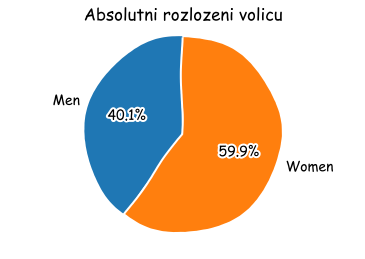

In [9]:
labels_1 = ['Men', 'Women']
sizes_1 = [df['muzi_volici2'].sum(), df['zeny_volici2'].sum()]
title_1 = "Absolutni rozlozeni volicu"

bake_pie(sizes_1, labels_1, title_1)

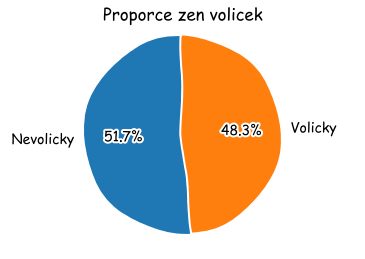

In [10]:
labels_2 = ["Nevolicky", "Volicky"]
sizes_2 = [(df['zeny'] - df['zeny_volici2']).sum(), df['zeny_volici2'].sum()]
title_2 = 'Proporce zen volicek'

bake_pie(sizes_2, labels_2, title_2)

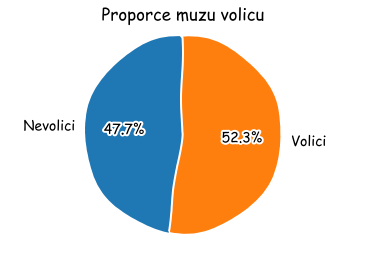

In [11]:
labels_3 = ["Nevolici", "Volici"]
sizes_3 = [(df['muzi'] - df['muzi_volici2']).sum(), df['muzi_volici2'].sum()]
title_3 = 'Proporce muzu volicu'

bake_pie(sizes_3, labels_3, title_3)

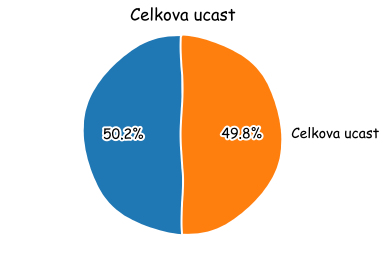

In [13]:
labels_4 = ["", "Celkova ucast"]
sizes_4 = [(df['celkem'] - df['celkem_volici']).sum(), df['celkem_volici'].sum()]
title_4 = 'Celkova ucast'

bake_pie(sizes_4, labels_4, title_4)

In [14]:
def make_bars(sizes, labels, title, xlabel, save_name=None):    
    fig, ax = plt.subplots(figsize=(12, 5))

    y_pos = np.arange(len(labels))

    ax.barh(y_pos, sizes)
    ax.set_xlim((0, 100))
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom


    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xticks(np.arange(0, 101, 5), minor=True)                                  

    
    if save_name:
        plt.savefig(save_name+'.png', dpi=300)

    plt.show()

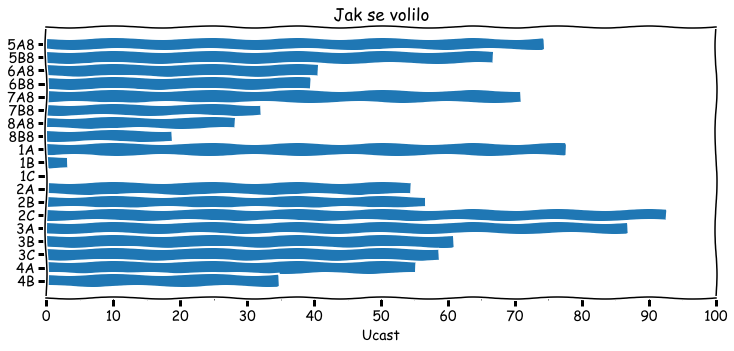

In [15]:
labels = df.trida
sizes = (df.celkem_volici / df.celkem) * 100

make_bars(sizes, labels, "Jak se volilo", "Ucast")

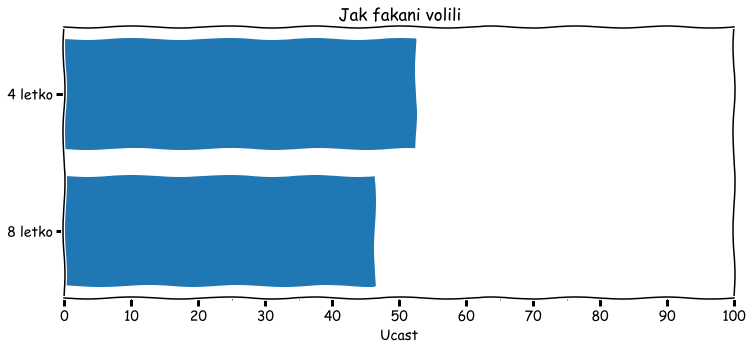

In [16]:
labels = ["4 letko", "8 letko"]
sizes = [(df[df['delka_studia'] == 4].celkem_volici.sum() / df[df['delka_studia'] == 4].celkem.sum()) * 100,
         (df[df['delka_studia'] == 8].celkem_volici.sum() / df[df['delka_studia'] == 8].celkem.sum()) * 100]

make_bars(sizes, labels, "Jak fakani volili", "Ucast")

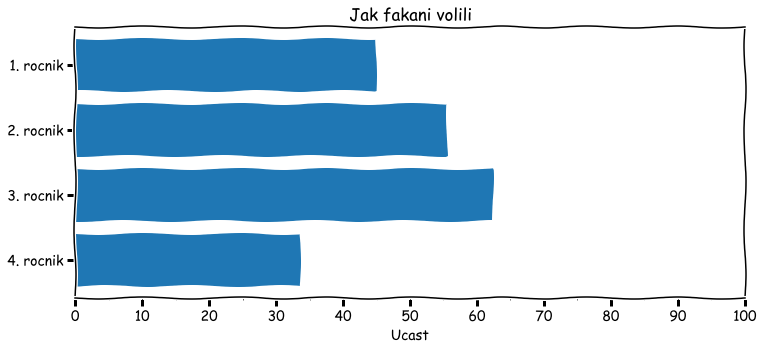

In [17]:
labels = ["{:d}. rocnik".format(r) for r in set(df['rocnik'])]
sizes = [(df[df['rocnik'] == r].celkem_volici.sum() / df[df['rocnik'] == r].celkem.sum()) * 100
         for r in set(df['rocnik'])]

make_bars(sizes, labels, "Jak fakani volili", "Ucast")

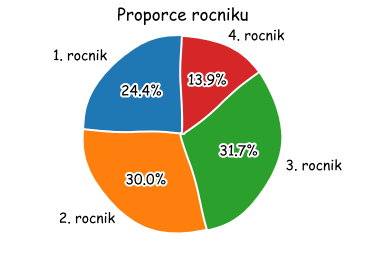

In [18]:
labels_4 = ["{:d}. rocnik".format(r) for r in set(df['rocnik'])]
sizes_4 = [df[df['rocnik'] == r].celkem_volici.sum() for r in set(df['rocnik'])]


title_4 = 'Proporce rocniku'

bake_pie(sizes_4, labels_4, title_4)

# Prezidenti

In [21]:
def make_pie(sizes, labels, title="", save_name=None):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(title)
    fig = plt.gcf()
    fig.set_size_inches(7.5,7.5) 
    
    if save_name:
        plt.savefig(save_name+'.png', dpi=300)
    plt.show()

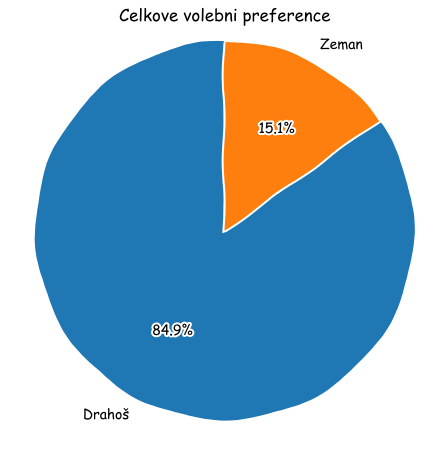

In [25]:
labels = ['Drahoš', 'Zeman']
sizes = [241, 43]
title = 'Celkove volebni preference'

make_pie(sizes, labels, title)